In [2]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np
from scipy import spatial
from astropy.table import Table
from astropy.cosmology import LambdaCDM as Cos
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.convolution import convolve, Box2DKernel

import matplotlib.pyplot as plt
from IPython import display 
from scipy import stats
from scipy.interpolate import interp1d, interp2d
from scipy.stats import norm

import fitsio

import time

import pickle
import dask
pd.options.mode.chained_assignment = None

In [3]:
north_members_with_centers = Table.read("/global/homes/m/mjyb16/north_members_final_2023.fits").to_pandas()

In [4]:
north_members_with_centers.head()

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
0,2922775070161480192,2922775070161480192,11.457633,0.228651,0.228651,0.009367,1.0
1,2901858490162312192,2901858490162312192,11.201893,0.708553,0.708553,0.079690,1.0
2,2920151290161653760,2920151290161653760,11.496993,0.570930,0.570930,0.040072,1.0
3,2921879870161378304,2921879870161378304,11.753055,0.318656,0.318656,0.015764,1.0
4,2915198290160026624,2915198290160026624,11.441989,0.185048,0.185048,0.005686,1.0


In [5]:
north_members = north_members_with_centers[north_members_with_centers.galaxy_z != north_members_with_centers.cluster_z].copy()

In [6]:
len(north_members)

4314706

In [20]:
north_members.cluster_z.max()

1.1085386276245117

In [62]:
bins_z = np.linspace(0.1, 1.1, 22)

In [63]:
bins_z

array([0.1       , 0.14761905, 0.1952381 , 0.24285714, 0.29047619,
       0.33809524, 0.38571429, 0.43333333, 0.48095238, 0.52857143,
       0.57619048, 0.62380952, 0.67142857, 0.71904762, 0.76666667,
       0.81428571, 0.86190476, 0.90952381, 0.95714286, 1.0047619 ,
       1.05238095, 1.1       ])

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


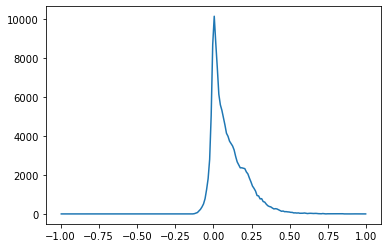

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


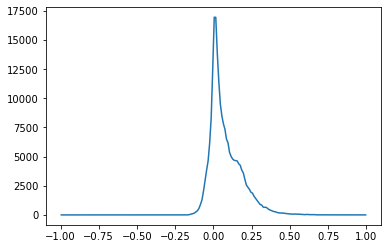

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


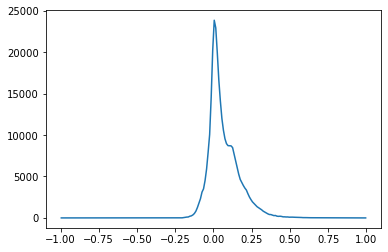

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


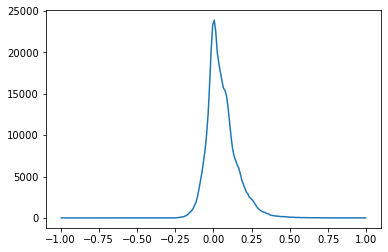

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


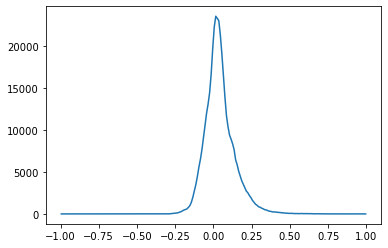

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


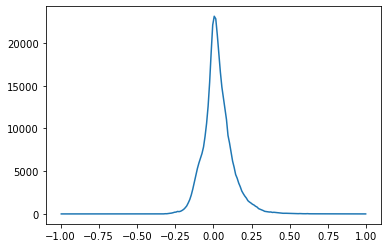

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


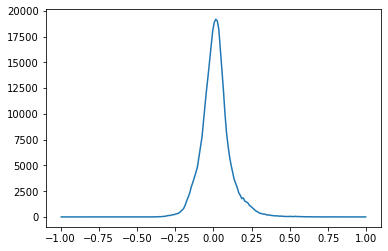

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


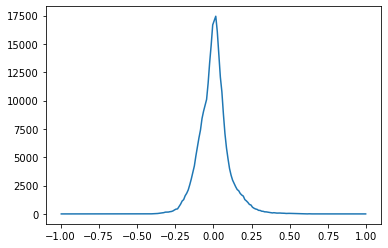

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


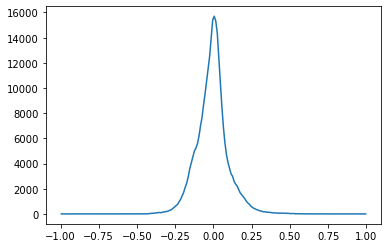

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


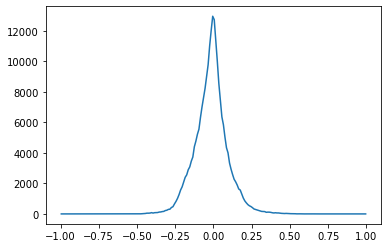

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


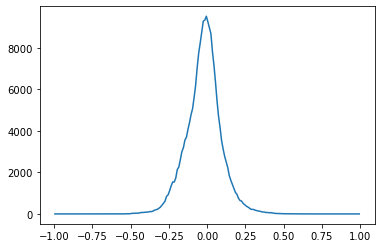

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


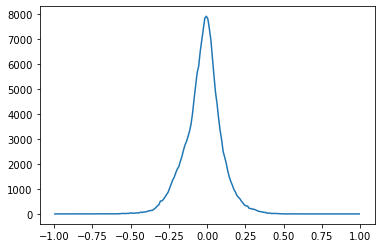

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


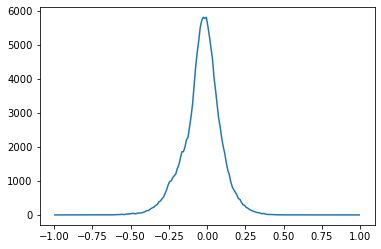

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


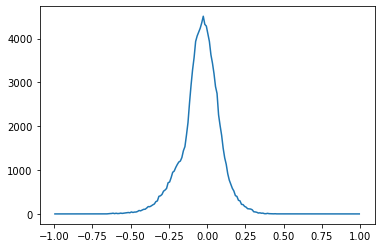

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


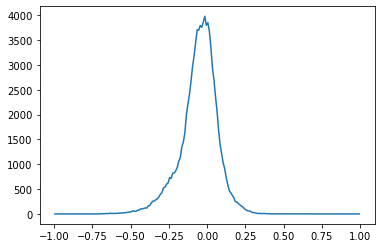

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


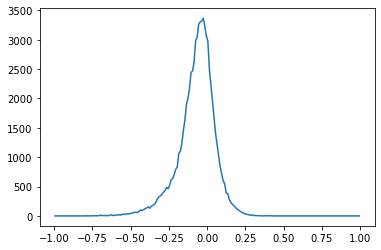

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


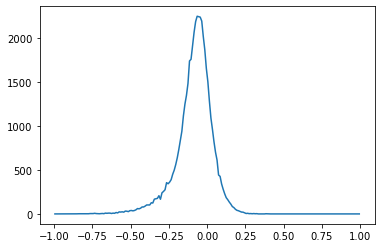

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


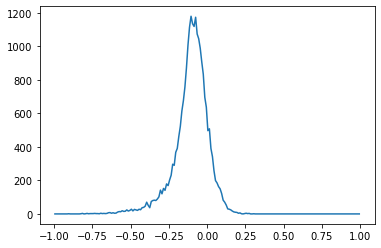

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


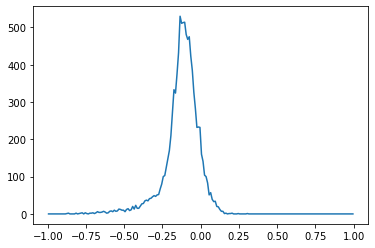

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


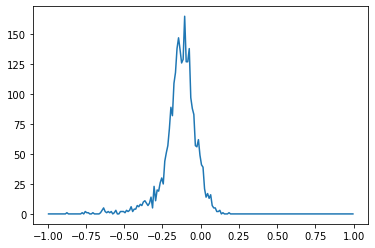

<ipython-input-67-accc7ed93289>:6: RuntimeWarning: divide by zero encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
<ipython-input-67-accc7ed93289>:6: RuntimeWarning: invalid value encountered in true_divide
  reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)


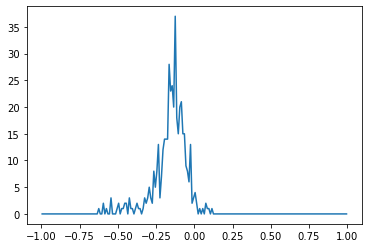

In [67]:
reweightings = np.ones((21, 200))
for i in range(21):
    members_bin = north_members[np.logical_and(north_members.cluster_z < bins_z[i+1], north_members.cluster_z > bins_z[i])]
    deltas = members_bin.galaxy_z - members_bin.cluster_z
    hist_deltas, edges = np.histogram(deltas, bins = np.linspace(-1, 1, 201))
    reweighting_bin = np.minimum(hist_deltas[::-1]/hist_deltas, 1)
    plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas)
    plt.show()
    reweightings[i] = reweighting_bin

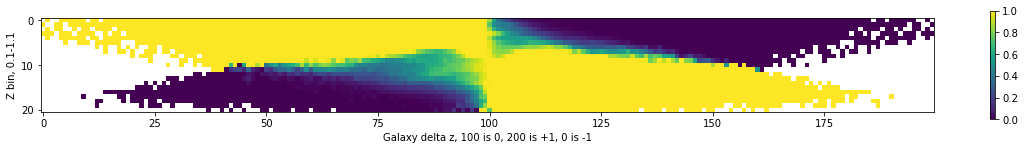

In [65]:
plt.figure(figsize = (20, 2))
plt.imshow(reweightings)
plt.colorbar()
plt.xlabel("Galaxy delta z, 100 is 0, 200 is +1, 0 is -1")
plt.ylabel("Z bin, 0.1-1.1")
plt.show()

In [9]:
deltas = north_members[north_members.cluster_z < 0.3].galaxy_z - north_members[north_members.cluster_z < 0.7].cluster_z

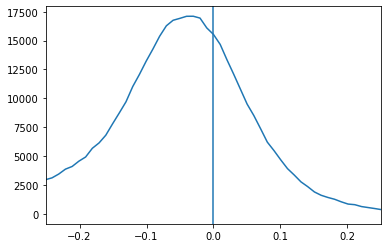

In [12]:
hist_deltas, edges = np.histogram(deltas, bins = np.linspace(-1, 1, 200))
plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas)
plt.axvline(0)
plt.xlim(-.25, .25)
plt.show()

<ipython-input-13-5da5c1eb1806>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(edges[:-1], hist_deltas[::-1]/hist_deltas)
<ipython-input-13-5da5c1eb1806>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(edges[:-1], hist_deltas[::-1]/hist_deltas)


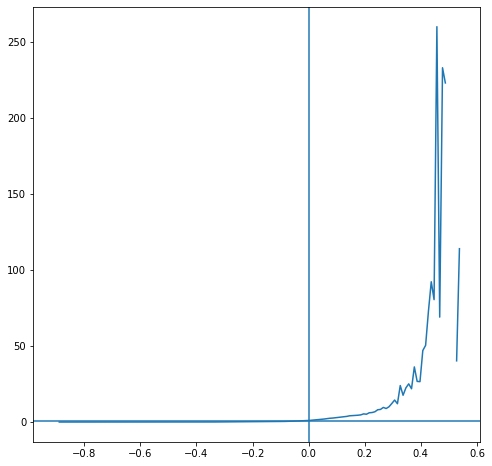

In [13]:
hist_deltas, edges = np.histogram(deltas, bins = np.linspace(-1, 1, 200))
plt.figure(figsize = (8, 8))
plt.plot(edges[:-1], hist_deltas[::-1]/hist_deltas)
plt.axhline(1)
plt.axvline(0)
plt.show()

<ipython-input-14-5384fcb8f615>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas[::-1]/hist_deltas)
<ipython-input-14-5384fcb8f615>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas[::-1]/hist_deltas)


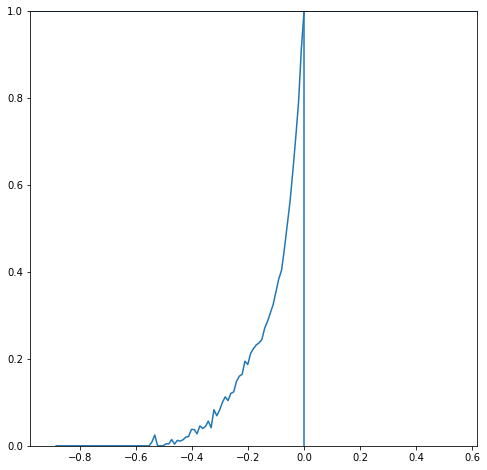

In [14]:
hist_deltas, edges = np.histogram(deltas, bins = np.linspace(-1, 1, 200))
plt.figure(figsize = (8, 8))
plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas[::-1]/hist_deltas)
plt.axhline(1)
plt.axvline(0)
plt.ylim(0, 1)
plt.show()

<ipython-input-100-2dc16ced2518>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas[::-1]/hist_deltas)
<ipython-input-100-2dc16ced2518>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas[::-1]/hist_deltas)


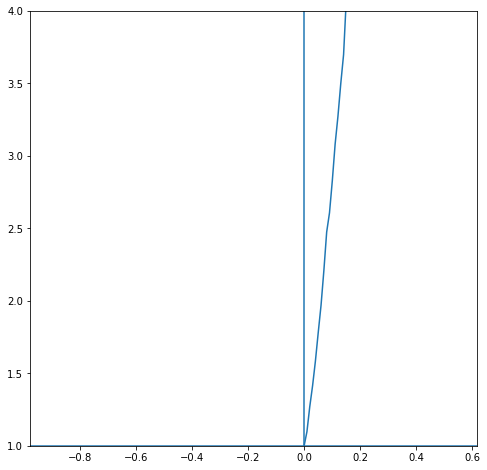

In [100]:
hist_deltas, edges = np.histogram(deltas, bins = np.linspace(-1, 1, 200))
plt.figure(figsize = (8, 8))
plt.plot(0.5*(edges[1:]+edges[:-1]), hist_deltas[::-1]/hist_deltas)
plt.axhline(1)
plt.axvline(0)
plt.ylim(1, 4)
plt.show()